In [6]:
import sys
from datetime import datetime
from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot
import datetime
import sys
from scipy.stats          import pearsonr
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

from pandas               import DataFrame
from pandas               import Series
from pandas               import read_csv
from pandas               import get_dummies
from numpy                import array
from numpy                import random
from numpy                import where
from numpy                import nan
from scipy.stats.mstats   import winsorize
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from matplotlib           import pyplot
from ieseg import partition
from ieseg import roc
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, GridSearchCV
import matplotlib.pyplot
import seaborn as sns

In [7]:
import sys
from datetime import datetime
from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot
import datetime
import sys
from scipy.stats          import pearsonr
import pandas as pd
import numpy

from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

In [8]:
# Use SQL in pandas DataFrame
# Ref: https://pypi.python.org/pypi/pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())  # Allow sqldf to access global environment

In [9]:
fin=read_csv("fin_data.csv",sep= ";")

In [10]:
from collections import Counter
print(Counter(fin['Default_12m']))

Counter({0.0: 293387, 1.0: 1582, nan: 1})


In [11]:
fin['time'] = fin['DATUM_AFSLUITING_BOEKJAAR'].str[7:9]

In [12]:
fin['time'] = fin.time.astype(int)

In [13]:
#drop the raw which target = NA
fin[fin.Default_12m.isna()]

,ONDERNEMINGSNUMMER,NATUUR,DATUM_AFSLUITING_BOEKJAAR,BEGINDATUM_BOEKJAAR,LENGTE_BOEKJAAR_IN_MAANDEN,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,...,RGTWOM,RGFIHB,RGFIHBR,RGFIHBI,RGBREVNB,RGGWSTS,RGVBRSZ,RGKBTA,RGSUBAUT,time
261505,876416180,70,31DEC2018,01JAN2018,12,NaN,1.6,1298732.0,171.95,37.25,...,NaN,3.00021,1.0,3.00021,0.15783,NaN,NaN,0.87847,NaN,18


In [14]:
fin.drop([261505], inplace=True)

In [15]:
fin['DATUM_AFSLUITING_BOEKJAAR'] = pd.to_datetime(fin['DATUM_AFSLUITING_BOEKJAAR'])

In [16]:
fin_18 = fin[fin['time'] == 18]

In [17]:
fin_19 = fin[fin['time'] == 19]

In [18]:
fin_18=fin_18.groupby('ONDERNEMINGSNUMMER',as_index=False).agg(
    { 
 'Default_12m':'max',
 'DATUM_AFSLUITING_BOEKJAAR':'max',
 'S001053':'max',
 'J002058':'max',
 'RBRUTTW':'max',
 'RNRBAVB':'max',
 'RNREVNB':'max',
 'RGRZFIN':'max',
 'RGRFOAH':'max',
 'RKTFISG':'max',
 'RDVVCFL':'max',
 'RNKASRA':'max',
 'RLIQUID':'max',
 'RACIDLQ':'max',
 'RNTBDRK':'max',
 'RCASHFL':'max',
 'RALGSCH':'max',
 'RBRVRKM':'max',
 'RNTVRKM':'max',
 'RDAGKLK':'max',
 'RDAGLVK':'max',
 'RGTWAP':'max',
 'RGPKAP':'max',
 'RGTWOM':'max',
 'RGFIHB':'max',
 'RGFIHBR':'max',
 'RGFIHBI':'max',
 'RGBREVNB':'max',
 'RGGWSTS':'max',
 'RGVBRSZ':'max',
 'RGKBTA':'max',
 'RGSUBAUT':'max',
 'time':'max'})

In [19]:
fin_19=fin_19.groupby('ONDERNEMINGSNUMMER',as_index=False).agg(
    { 
 'Default_12m':'max',
 'DATUM_AFSLUITING_BOEKJAAR':'max',
 'S001053':'max',
 'J002058':'max',
 'RBRUTTW':'max',
 'RNRBAVB':'max',
 'RNREVNB':'max',
 'RGRZFIN':'max',
 'RGRFOAH':'max',
 'RKTFISG':'max',
 'RDVVCFL':'max',
 'RNKASRA':'max',
 'RLIQUID':'max',
 'RACIDLQ':'max',
 'RNTBDRK':'max',
 'RCASHFL':'max',
 'RALGSCH':'max',
 'RBRVRKM':'max',
 'RNTVRKM':'max',
 'RDAGKLK':'max',
 'RDAGLVK':'max',
 'RGTWAP':'max',
 'RGPKAP':'max',
 'RGTWOM':'max',
 'RGFIHB':'max',
 'RGFIHBR':'max',
 'RGFIHBI':'max',
 'RGBREVNB':'max',
 'RGGWSTS':'max',
 'RGVBRSZ':'max',
 'RGKBTA':'max',
 'RGSUBAUT':'max',
 'time':'max'})

In [20]:
fin = pd.concat([fin_18,fin_19])

In [21]:
fin

,ONDERNEMINGSNUMMER,Default_12m,DATUM_AFSLUITING_BOEKJAAR,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,...,RGTWOM,RGFIHB,RGFIHBR,RGFIHBI,RGBREVNB,RGGWSTS,RGVBRSZ,RGKBTA,RGSUBAUT,time
0,200065765,0.0,2018-12-31,22.0,7.460528e+07,555.01,17.60,55.12,14.03,17.42,...,0.39714,5.33208,0.92889,5.74028,0.71971,0.01361,NaN,0.43177,NaN,18
1,200068636,0.0,2018-12-31,841.5,2.948305e+09,289.85,2.02,1.75,8.37,54.82,...,0.40698,0.85144,0.46673,1.82428,0.06093,0.02175,NaN,0.00081,NaN,18
2,200305493,0.0,2018-12-31,45.5,4.822040e+07,123.75,0.64,0.58,12.28,68.20,...,0.29126,0.71451,0.48727,1.46636,0.02344,NaN,NaN,0.04317,NaN,18
3,200362210,0.0,2018-12-31,445.0,5.103837e+08,209.95,3.78,3.86,16.07,33.69,...,0.40279,1.03820,0.34980,2.96801,0.12380,NaN,0.32023,0.04291,NaN,18
4,200762878,0.0,2018-12-31,158.1,7.659361e+06,104.62,1.81,1.34,40.20,47.08,...,NaN,0.60374,0.28424,2.12407,0.07349,NaN,NaN,0.28715,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,2019-03-31,NaN,6.575100e+04,NaN,-22.68,NaN,-35.85,-4.67,...,NaN,-21.39635,1.00000,-21.39635,2.35014,NaN,NaN,0.02101,NaN,19
44683,899989853,0.0,2019-03-31,NaN,1.230280e+05,NaN,10.53,-13.49,41.51,46.55,...,NaN,2.14828,1.00000,2.14828,0.06270,NaN,NaN,0.02967,NaN,19
44684,899991536,0.0,2019-03-31,NaN,9.367900e+04,NaN,-4.98,-4.98,59.64,72.87,...,NaN,1.37224,1.00000,1.37224,0.05922,NaN,NaN,0.00418,NaN,19
44685,899992427,0.0,2019-06-30,2.8,3.651830e+06,999.99,36.82,36.08,55.92,56.42,...,NaN,1.77227,1.00000,1.77227,0.60198,0.77923,NaN,0.15318,NaN,19


ONDERNEMINGSNUMMER           0.000000
Default_12m                  0.000000
DATUM_AFSLUITING_BOEKJAAR    0.000000
S001053                      0.595986
J002058                      0.002824
RBRUTTW                      0.490565
RNRBAVB                      0.005923
RNREVNB                      0.107001
RGRZFIN                      0.003566
RGRFOAH                      0.002970
RKTFISG                      0.760186
RDVVCFL                      0.004672
RNKASRA                      0.007764
RLIQUID                      0.006838
RACIDLQ                      0.009099
RNTBDRK                      0.002519
RCASHFL                      0.013337
RALGSCH                      0.004380
RBRVRKM                      0.877357
RNTVRKM                      0.877554
RDAGKLK                      0.890287
RDAGLVK                      0.874706
RGTWAP                       0.722884
RGPKAP                       0.722887
RGTWOM                       0.977510
RGFIHB                       0.017548
RGFIHBR     

<AxesSubplot:>

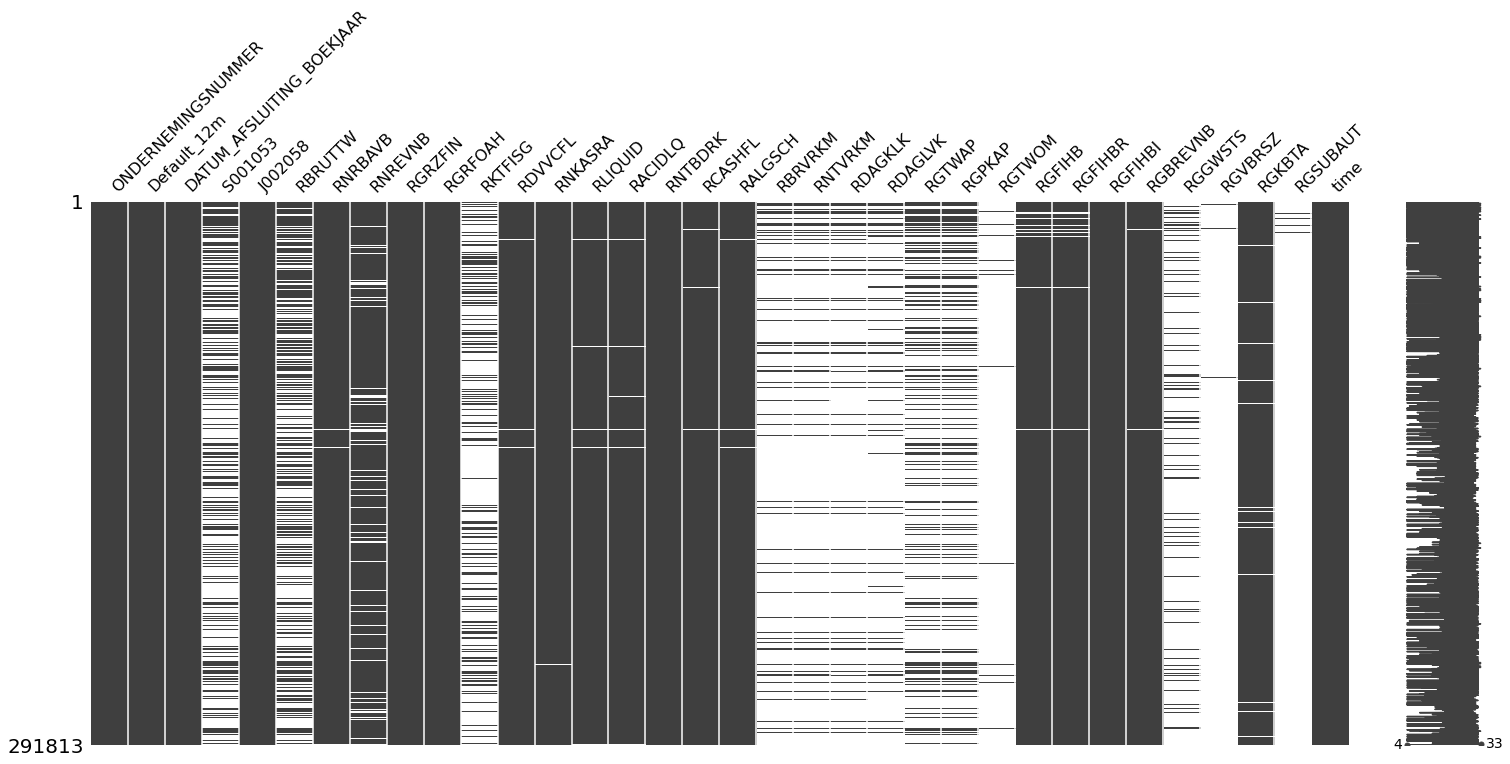

In [22]:
# check missing values
print(fin.isna().sum()/294970)

import missingno as msno # pip install missingno
%matplotlib inline
msno.matrix(fin)

In [24]:
fin

,ONDERNEMINGSNUMMER,Default_12m,DATUM_AFSLUITING_BOEKJAAR,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,...,RGTWOM,RGFIHB,RGFIHBR,RGFIHBI,RGBREVNB,RGGWSTS,RGVBRSZ,RGKBTA,RGSUBAUT,time
0,200065765,0.0,2018-12-31,22.0,7.460528e+07,555.01,17.60,55.12,14.03,17.42,...,0.39714,5.33208,0.92889,5.74028,0.71971,0.01361,NaN,0.43177,NaN,18
1,200068636,0.0,2018-12-31,841.5,2.948305e+09,289.85,2.02,1.75,8.37,54.82,...,0.40698,0.85144,0.46673,1.82428,0.06093,0.02175,NaN,0.00081,NaN,18
2,200305493,0.0,2018-12-31,45.5,4.822040e+07,123.75,0.64,0.58,12.28,68.20,...,0.29126,0.71451,0.48727,1.46636,0.02344,NaN,NaN,0.04317,NaN,18
3,200362210,0.0,2018-12-31,445.0,5.103837e+08,209.95,3.78,3.86,16.07,33.69,...,0.40279,1.03820,0.34980,2.96801,0.12380,NaN,0.32023,0.04291,NaN,18
4,200762878,0.0,2018-12-31,158.1,7.659361e+06,104.62,1.81,1.34,40.20,47.08,...,NaN,0.60374,0.28424,2.12407,0.07349,NaN,NaN,0.28715,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,2019-03-31,NaN,6.575100e+04,NaN,-22.68,NaN,-35.85,-4.67,...,NaN,-21.39635,1.00000,-21.39635,2.35014,NaN,NaN,0.02101,NaN,19
44683,899989853,0.0,2019-03-31,NaN,1.230280e+05,NaN,10.53,-13.49,41.51,46.55,...,NaN,2.14828,1.00000,2.14828,0.06270,NaN,NaN,0.02967,NaN,19
44684,899991536,0.0,2019-03-31,NaN,9.367900e+04,NaN,-4.98,-4.98,59.64,72.87,...,NaN,1.37224,1.00000,1.37224,0.05922,NaN,NaN,0.00418,NaN,19
44685,899992427,0.0,2019-06-30,2.8,3.651830e+06,999.99,36.82,36.08,55.92,56.42,...,NaN,1.77227,1.00000,1.77227,0.60198,0.77923,NaN,0.15318,NaN,19


In [25]:
def treatContinuous (variable: str, inDataSet: DataFrame) -> DataFrame:
    inDataSet[f"fl_{variable}_is_missing"] = where(inDataSet[variable].isnull(), 1, 0)
    inDataSet[variable] = inDataSet[variable].replace({nan: inDataSet[variable].mean()})
    inDataSet[variable] = winsorize(array(inDataSet[variable].astype(float)), limits = [0.00, 0.01])
    return inDataSet

In [26]:
for column in fin:
    if column not in ['ONDERNEMINGSNUMMER','Default_12m','DATUM_AFSLUITING_BOEKJAAR']:
        fin = treatContinuous(variable = column, inDataSet = fin)

In [27]:
fin

,ONDERNEMINGSNUMMER,Default_12m,DATUM_AFSLUITING_BOEKJAAR,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,...,fl_RGTWOM_is_missing,fl_RGFIHB_is_missing,fl_RGFIHBR_is_missing,fl_RGFIHBI_is_missing,fl_RGBREVNB_is_missing,fl_RGGWSTS_is_missing,fl_RGVBRSZ_is_missing,fl_RGKBTA_is_missing,fl_RGSUBAUT_is_missing,fl_time_is_missing
0,200065765,0.0,2018-12-31,22.000000,35969781.0,555.010000,17.60,55.120000,14.03,17.42,...,0,0,0,0,0,0,1,0,1,0
1,200068636,0.0,2018-12-31,100.400000,35969781.0,289.850000,2.02,1.750000,8.37,54.82,...,0,0,0,0,0,0,1,0,1,0
2,200305493,0.0,2018-12-31,45.500000,35969781.0,123.750000,0.64,0.580000,12.28,68.20,...,0,0,0,0,0,1,1,0,1,0
3,200362210,0.0,2018-12-31,100.400000,35969781.0,209.950000,3.78,3.860000,16.07,33.69,...,0,0,0,0,0,1,0,0,1,0
4,200762878,0.0,2018-12-31,100.400000,7659361.0,104.620000,1.81,1.340000,40.20,47.08,...,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,2019-03-31,18.845083,65751.0,284.778095,-22.68,15.994681,-35.85,-4.67,...,1,0,0,0,0,1,1,0,1,0
44683,899989853,0.0,2019-03-31,18.845083,123028.0,284.778095,10.53,-13.490000,41.51,46.55,...,1,0,0,0,0,1,1,0,1,0
44684,899991536,0.0,2019-03-31,18.845083,93679.0,284.778095,-4.98,-4.980000,59.64,72.87,...,1,0,0,0,0,1,1,0,1,0
44685,899992427,0.0,2019-06-30,2.800000,3651830.0,999.990000,36.82,36.080000,55.92,56.42,...,1,0,0,0,0,0,1,0,1,0


In [28]:
normalizer_features = ['S001053',
 'J002058',
 'RBRUTTW',
 'RNRBAVB',
 'RNREVNB',
 'RGRZFIN',
 'RGRFOAH',
 'RKTFISG',
 'RDVVCFL',
 'RNKASRA',
 'RLIQUID',
 'RACIDLQ',
 'RNTBDRK',
 'RCASHFL',
 'RALGSCH',
 'RBRVRKM',
 'RNTVRKM',
 'RDAGKLK',
 'RDAGLVK',
 'RGTWAP',
 'RGPKAP',
 'RGTWOM',
 'RGFIHB',
 'RGFIHBR',
 'RGFIHBI',
 'RGBREVNB',
 'RGGWSTS',
 'RGVBRSZ',
 'RGKBTA',
 'RGSUBAUT']

In [29]:
from sklearn.preprocessing import MinMaxScaler
# Build the normalizer on train
for v in fin[normalizer_features]:
        scaler = MinMaxScaler().fit(fin[[v]])
        # Apply on train, test
        fin[v] = scaler.transform(fin[[v]])

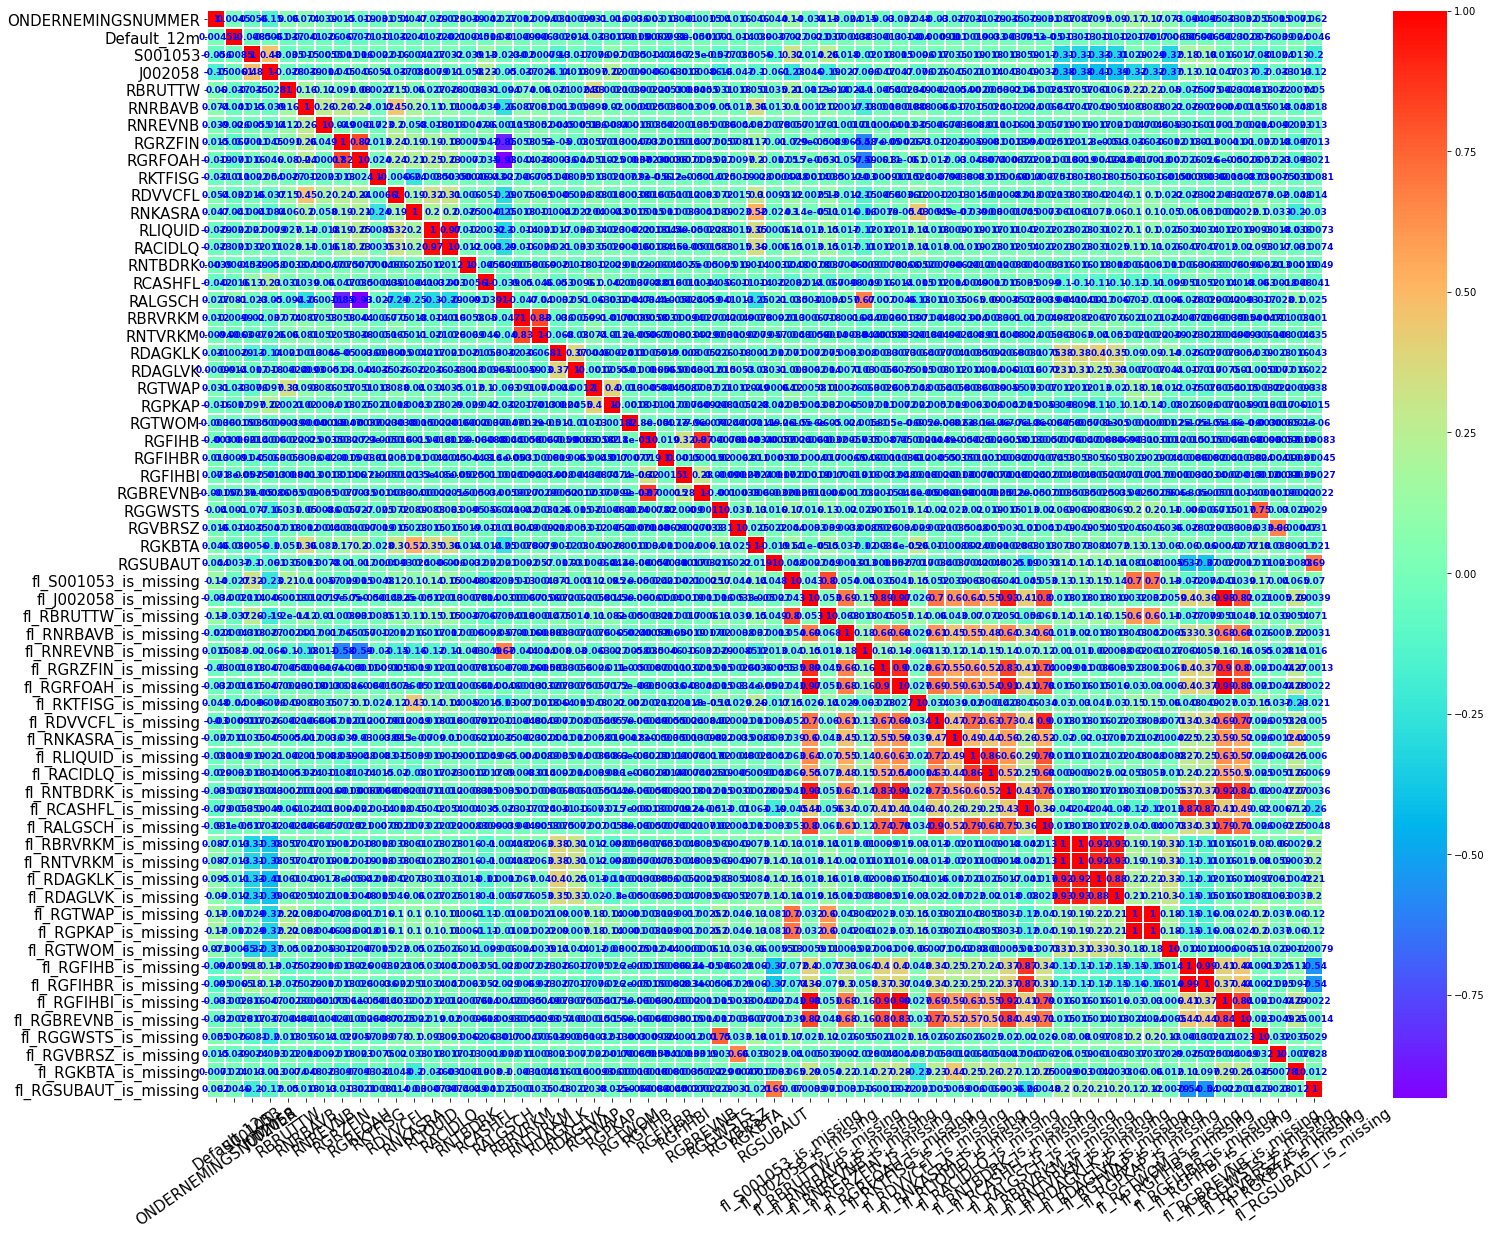

In [20]:
import seaborn as sns
corr = fin.corr()#The correlation coefficient of each variable was calculated
xticks = list(corr.index)#x label
yticks = list(corr.index)#y label
fig = plt.figure(figsize=(25,20))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()

In [21]:
corr.to_csv("corr_fin.csv",index=False)

In [30]:
variables = [
'ONDERNEMINGSNUMMER',
'Default_12m',
'DATUM_AFSLUITING_BOEKJAAR',
'S001053',
'J002058',
'RBRUTTW',
'RNRBAVB',
'RNREVNB',
'RKTFISG',
'RDVVCFL',
'RNKASRA',
'RACIDLQ',
'RNTBDRK',
'RCASHFL',
'RALGSCH',
'RNTVRKM',
'RDAGKLK',
'RDAGLVK',
'RGTWAP',
'RGFIHBR',
'RGFIHBI',
'RGBREVNB',
'RGGWSTS',
'RGKBTA',
'fl_RBRUTTW_is_missing',
'fl_RNRBAVB_is_missing',
'fl_RNREVNB_is_missing',
'fl_RKTFISG_is_missing',
'fl_RNKASRA_is_missing',
'fl_RACIDLQ_is_missing',
'fl_RALGSCH_is_missing',
'fl_RDAGLVK_is_missing',
'fl_RGPKAP_is_missing',
'fl_RGTWOM_is_missing',
'fl_RGFIHBR_is_missing',
'fl_RGBREVNB_is_missing',
'fl_RGGWSTS_is_missing',
'fl_RGVBRSZ_is_missing',
'fl_RGKBTA_is_missing',
'fl_RGSUBAUT_is_missing']

In [31]:
fin = fin[variables]

In [32]:
fin

,ONDERNEMINGSNUMMER,Default_12m,DATUM_AFSLUITING_BOEKJAAR,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RKTFISG,RDVVCFL,...,fl_RALGSCH_is_missing,fl_RDAGLVK_is_missing,fl_RGPKAP_is_missing,fl_RGTWOM_is_missing,fl_RGFIHBR_is_missing,fl_RGBREVNB_is_missing,fl_RGGWSTS_is_missing,fl_RGVBRSZ_is_missing,fl_RGKBTA_is_missing,fl_RGSUBAUT_is_missing
0,200065765,0.0,2018-12-31,0.218345,1.000000,0.777508,0.693674,0.836498,0.306214,0.652385,...,0,0,0,0,0,0,0,1,0,1
1,200068636,0.0,2018-12-31,1.000000,1.000000,0.644926,0.683051,0.794180,0.436472,0.647382,...,0,0,0,0,0,0,0,1,0,1
2,200305493,0.0,2018-12-31,0.452642,1.000000,0.561876,0.682110,0.793252,0.306214,0.645457,...,0,0,0,0,0,0,1,1,0,1
3,200362210,0.0,2018-12-31,1.000000,1.000000,0.604976,0.684251,0.795853,0.252802,0.646577,...,0,0,0,0,0,0,1,0,0,1
4,200762878,0.0,2018-12-31,1.000000,0.212939,0.552311,0.682908,0.793855,0.306214,0.645966,...,0,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,2019-03-31,0.186890,0.001828,0.642390,0.666210,0.805475,0.306214,0.635889,...,0,1,1,1,0,0,1,1,0,1
44683,899989853,0.0,2019-03-31,0.186890,0.003420,0.642390,0.688853,0.782096,0.306214,0.635606,...,0,1,1,1,0,0,1,1,0,1
44684,899991536,0.0,2019-03-31,0.186890,0.002604,0.642390,0.678278,0.788844,0.306214,0.651297,...,0,1,1,1,0,0,1,1,0,1
44685,899992427,0.0,2019-06-30,0.026919,0.101525,1.000000,0.706779,0.821401,0.306214,0.678038,...,0,1,0,1,0,0,0,1,0,1


In [33]:
import datetime
trainingSet=fin[fin.DATUM_AFSLUITING_BOEKJAAR<'01/01/2019']
trainingSet.shape

testSet=fin[fin.DATUM_AFSLUITING_BOEKJAAR>='01/01/2019']
testSet.shape

(44687, 40)

In [34]:
trainingSet = trainingSet.drop('DATUM_AFSLUITING_BOEKJAAR', axis = 1)
testSet = testSet.drop('DATUM_AFSLUITING_BOEKJAAR', axis = 1)

In [35]:
fin = fin.drop('DATUM_AFSLUITING_BOEKJAAR', axis = 1)

In [36]:
print(Counter(fin['Default_12m']))

Counter({0.0: 290261, 1.0: 1552})


In [37]:
#smote

In [38]:
X = trainingSet.values.tolist()

In [39]:
y = trainingSet['Default_12m'].tolist()

In [40]:
# Using SMOTE
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=123)
X_smo, y_smo = smo.fit_resample(X,y)

In [41]:
print(Counter(y_smo))

Counter({0.0: 245721, 1.0: 245721})


In [42]:
trainingSet_resample = DataFrame(X_smo)
trainingSet_resample

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,2.000658e+08,0.0,0.218345,1.000000,0.777508,0.693674,0.836498,0.306214,0.652385,0.949511,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.0
1,2.000686e+08,0.0,1.000000,1.000000,0.644926,0.683051,0.794180,0.436472,0.647382,0.877239,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.0
2,2.003055e+08,0.0,0.452642,1.000000,0.561876,0.682110,0.793252,0.306214,0.645457,0.913412,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,1.0
3,2.003622e+08,0.0,1.000000,1.000000,0.604976,0.684251,0.795853,0.252802,0.646577,0.913512,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,1.0
4,2.007629e+08,0.0,1.000000,0.212939,0.552311,0.682908,0.793855,0.306214,0.645966,0.953628,...,0.0,0.0,0.000000,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491437,8.261820e+08,1.0,0.084415,0.009593,0.569016,0.662679,0.786358,0.079150,0.643995,0.907908,...,0.0,1.0,0.132279,1.0,0.0,0.0,1.000000,0.132279,0.867721,1.0
491438,8.093453e+08,1.0,0.176988,0.018424,0.644952,0.689897,0.806761,0.289267,0.649672,0.910347,...,0.0,1.0,1.000000,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.0
491439,8.719500e+08,1.0,0.049721,0.020708,0.531629,0.668469,0.797000,0.378375,0.635616,0.901742,...,0.0,1.0,0.000000,1.0,0.0,0.0,1.000000,0.235653,0.000000,1.0
491440,6.430905e+08,1.0,0.020527,0.007125,0.640726,0.682626,0.816516,0.367261,0.648233,0.917771,...,0.0,1.0,0.768229,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.0


In [43]:
id_var = ['ONDERNEMINGSNUMMER']
target_var = ['Default_12m']
predictors = [v for v in trainingSet_resample.columns if v not in id_var + target_var]

In [44]:
trainingSet_resample.columns = trainingSet.columns

In [45]:
trainingSet_resample

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RKTFISG,RDVVCFL,RNKASRA,...,fl_RALGSCH_is_missing,fl_RDAGLVK_is_missing,fl_RGPKAP_is_missing,fl_RGTWOM_is_missing,fl_RGFIHBR_is_missing,fl_RGBREVNB_is_missing,fl_RGGWSTS_is_missing,fl_RGVBRSZ_is_missing,fl_RGKBTA_is_missing,fl_RGSUBAUT_is_missing
0,2.000658e+08,0.0,0.218345,1.000000,0.777508,0.693674,0.836498,0.306214,0.652385,0.949511,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.0
1,2.000686e+08,0.0,1.000000,1.000000,0.644926,0.683051,0.794180,0.436472,0.647382,0.877239,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.0
2,2.003055e+08,0.0,0.452642,1.000000,0.561876,0.682110,0.793252,0.306214,0.645457,0.913412,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,1.0
3,2.003622e+08,0.0,1.000000,1.000000,0.604976,0.684251,0.795853,0.252802,0.646577,0.913512,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,1.0
4,2.007629e+08,0.0,1.000000,0.212939,0.552311,0.682908,0.793855,0.306214,0.645966,0.953628,...,0.0,0.0,0.000000,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491437,8.261820e+08,1.0,0.084415,0.009593,0.569016,0.662679,0.786358,0.079150,0.643995,0.907908,...,0.0,1.0,0.132279,1.0,0.0,0.0,1.000000,0.132279,0.867721,1.0
491438,8.093453e+08,1.0,0.176988,0.018424,0.644952,0.689897,0.806761,0.289267,0.649672,0.910347,...,0.0,1.0,1.000000,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.0
491439,8.719500e+08,1.0,0.049721,0.020708,0.531629,0.668469,0.797000,0.378375,0.635616,0.901742,...,0.0,1.0,0.000000,1.0,0.0,0.0,1.000000,0.235653,0.000000,1.0
491440,6.430905e+08,1.0,0.020527,0.007125,0.640726,0.682626,0.816516,0.367261,0.648233,0.917771,...,0.0,1.0,0.768229,1.0,0.0,0.0,1.000000,1.000000,0.000000,1.0


In [46]:
id_var = ['ONDERNEMINGSNUMMER']
target_var = ['Default_12m']
predictors = [v for v in trainingSet_resample.columns if v not in id_var + target_var]

In [47]:
def FisherScore(bt, target_var, predictors):
    """
    This function calculate the Fisher score of a variable.

    Ref:
    ---
    Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights
    into churn prediction in the telecommunication sector: A profit driven data mining
    approach. European Journal of Operational Research, 218(1), 211-229.
    """
    
    # Get the unique values of dependent variable
    target_var_val = bt[target_var].unique()
    # Calculate FisherScore for each predictor
    predictor_FisherScore = []
    for v in predictors:
        fs = np.abs(np.mean(bt.loc[bt[target_var]==target_var_val[0], v]) - np.mean(bt.loc[bt[target_var]==target_var_val[1], v])) / \
             np.sqrt(np.var(bt.loc[bt[target_var]==target_var_val[0], v]) + np.var(bt.loc[bt[target_var]==target_var_val[1], v]))
        predictor_FisherScore.append(fs)
    return predictor_FisherScore

In [48]:
# Calculate Fisher Score for all variable
fs = FisherScore(trainingSet_resample, target_var[0], predictors)
fs_df = pd.DataFrame({"predictor":predictors, "fisherscore":fs})
fs_df = fs_df.sort_values('fisherscore', ascending=False)
fs_df

,predictor,fisherscore
23,fl_RNREVNB_is_missing,0.662306
11,RALGSCH,0.643737
20,RGKBTA,0.485155
7,RNKASRA,0.458128
21,fl_RBRUTTW_is_missing,0.412767
24,fl_RKTFISG_is_missing,0.409375
3,RNRBAVB,0.400723
6,RDVVCFL,0.385686
2,RBRUTTW,0.364646
15,RGTWAP,0.308697


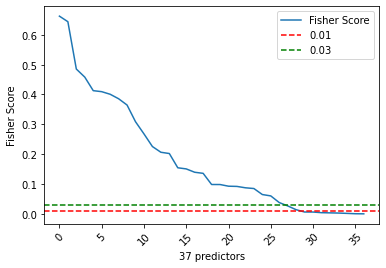

In [49]:
# Visualize the Fisher Score
plt.plot(fs_df['fisherscore'].values.squeeze())
plt.axhline(y=0.01, linestyle='dashed', color='red')
plt.axhline(y=0.03, linestyle='dashed', color='green')
plt.xticks(rotation=45)
plt.xlabel(str(fs_df.shape[0]) + ' predictors')
plt.ylabel('Fisher Score')
plt.legend(['Fisher Score', '0.01', '0.03'])
plt.show()

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _chec

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Added # top vars : 20


D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

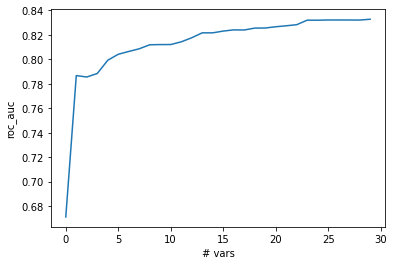

In [109]:
# Check how AUC change when add more variables: Top 30 vars
#LogisticRegression
fs_scores = []
for i in range(1, 30+1):
    if i % 20 == 0: print('Added # top vars :', i)
    top_n_predictors = fs_df['predictor'][:i]
    clf = LogisticRegression()
    fs_scores.append(cross_validate(clf, trainingSet[top_n_predictors], trainingSet[target_var].values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0))

# How the AUC curve looks like when adding top vars
plt.plot([s['test_score'].mean() for s in fs_scores])
plt.xlabel('# vars')
plt.ylabel('roc_auc')
plt.show()

Added # top vars : 20


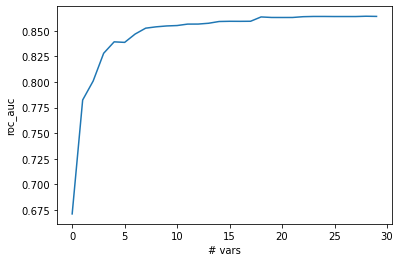

In [43]:
# Check how AUC change when add more variables: Top 30 vars
#LogisticRegression
fs_scores = []
for i in range(1, 30+1):
    if i % 20 == 0: print('Added # top vars :', i)
    top_n_predictors = fs_df['predictor'][:i]
    clf = GradientBoostingClassifier()
    fs_scores.append(cross_validate(clf, trainingSet[top_n_predictors], trainingSet[target_var].values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0))

# How the AUC curve looks like when adding top vars
plt.plot([s['test_score'].mean() for s in fs_scores])
plt.xlabel('# vars')
plt.ylabel('roc_auc')
plt.show()

In [50]:
# Select the top variables based on Fisher Score
# top_fs_vars = fs_df[fs_df['fisherscore'] >= 0.03]['predictor'].values
top_fs_vars = fs_df['predictor'].values[:23]
print("Selected # vars :", len(top_fs_vars))
top_fs_vars

Selected # vars : 23


array(['fl_RNREVNB_is_missing', 'RALGSCH', 'RGKBTA', 'RNKASRA',
       'fl_RBRUTTW_is_missing', 'fl_RKTFISG_is_missing', 'RNRBAVB',
       'RDVVCFL', 'RBRUTTW', 'RGTWAP', 'RACIDLQ', 'fl_RGVBRSZ_is_missing',
       'RNREVNB', 'fl_RGKBTA_is_missing', 'RCASHFL',
       'fl_RGPKAP_is_missing', 'RDAGLVK', 'S001053', 'J002058', 'RKTFISG',
       'fl_RDAGLVK_is_missing', 'fl_RGFIHBR_is_missing',
       'fl_RNKASRA_is_missing'], dtype=object)

In [63]:
features1 = ['fl_RNREVNB_is_missing', 'RALGSCH', 'RGKBTA', 'RNKASRA',
       'fl_RBRUTTW_is_missing', 'fl_RKTFISG_is_missing', 'RNRBAVB',
       'RDVVCFL', 'RBRUTTW', 'RGTWAP', 'RACIDLQ', 'fl_RGVBRSZ_is_missing',
       'RNREVNB', 'fl_RGKBTA_is_missing', 'RCASHFL',
       'fl_RGPKAP_is_missing', 'RDAGLVK', 'S001053', 'J002058', 'RKTFISG',
       'fl_RDAGLVK_is_missing', 'fl_RGFIHBR_is_missing',
       'fl_RNKASRA_is_missing']
target1 = 'Default_12m'

In [57]:
# Select the top variables based on Fisher Score
# top_fs_vars = fs_df[fs_df['fisherscore'] >= 0.03]['predictor'].values
top_fs_vars = fs_df['predictor'].values[:18]
print("Selected # vars :", len(top_fs_vars))
top_fs_vars

Selected # vars : 18


array(['fl_RNREVNB_is_missing', 'RALGSCH', 'RGKBTA', 'RNKASRA',
       'fl_RBRUTTW_is_missing', 'fl_RKTFISG_is_missing', 'RNRBAVB',
       'RDVVCFL', 'RBRUTTW', 'RGTWAP', 'RACIDLQ', 'fl_RGVBRSZ_is_missing',
       'RNREVNB', 'fl_RGKBTA_is_missing', 'RCASHFL',
       'fl_RGPKAP_is_missing', 'RDAGLVK', 'S001053'], dtype=object)

In [64]:
features2 = ['fl_RNREVNB_is_missing', 'RALGSCH', 'RGKBTA', 'RNKASRA',
       'fl_RBRUTTW_is_missing', 'fl_RKTFISG_is_missing', 'RNRBAVB',
       'RDVVCFL', 'RBRUTTW', 'RGTWAP', 'RACIDLQ', 'fl_RGVBRSZ_is_missing',
       'RNREVNB', 'fl_RGKBTA_is_missing', 'RCASHFL',
       'fl_RGPKAP_is_missing', 'RDAGLVK', 'S001053']
target2 = 'Default_12m'

In [65]:
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression()
randomForest = RandomForestClassifier(n_estimators = 100)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [66]:
models = {
          "logistic"     :logistic,
         }

In [67]:
for model in models:
    models[model].fit(trainingSet_resample[features1],trainingSet_resample[target1])
    print(f"{model} has been trained successfully")

logistic has been trained successfully


D:\IESEG\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [151]:
predictions_logistic   = logistic.predict(testSet[features1])
probabilities_logistic = DataFrame(logistic.predict_proba(testSet[features1]))[1]
p_logistic = precision_score(testSet[target1], predictions_logistic)
r_logistic = recall_score(testSet[target1], predictions_logistic)
f1score_logistic = f1_score(testSet[target1], predictions_logistic)
auc_logistic       = roc_auc_score(array(testSet[target1]),array(probabilities_logistic))
print(p_logistic)
print(r_logistic)
print(f1score_logistic)
print(auc_logistic)

0.012231080048050671
0.7619047619047619
0.024075666380051593
0.8686825875388323


In [69]:
models2 = {
          "boostedTree"     :boostedTree,
         }

In [70]:
for model in models2:
    models2[model].fit(trainingSet_resample[features2],trainingSet_resample[target2])
    print(f"{model} has been trained successfully")

boostedTree has been trained successfully


In [152]:
predictions_boostedTree   = boostedTree.predict(testSet[features2])
probabilities_boostedTree = DataFrame(boostedTree.predict_proba(testSet[features2]))[1]
p_boostedTree = precision_score(testSet[target2], predictions_boostedTree)
r_boostedTree = recall_score(testSet[target2], predictions_boostedTree)
f1score_boostedTree = f1_score(testSet[target2], predictions_boostedTree)
auc_boostedTree       = roc_auc_score(array(testSet[target2]),array(probabilities_boostedTree))
print(p_boostedTree)
print(r_boostedTree)
print(f1score_boostedTree)
print(auc_boostedTree)

0.05890804597701149
0.2789115646258503
0.09727164887307235
0.8610422795072227


In [72]:
#plot ROC curve

In [153]:
trainingSet["proba default logistic"] = DataFrame(logistic.predict_proba(trainingSet[features1]))[1]
testSet["proba default logistic"]     = DataFrame(logistic.predict_proba(testSet[features1]))[1]

In [154]:
rocTraining = roc(dataSet = trainingSet, actuals = target, probability = "proba default logistic")
rocTest     = roc(dataSet = testSet, actuals = target, probability = "proba default logistic")

In [169]:
aucTraining = auc(rocTraining["False positive rate"],rocTraining["True positive rate"])
aucTest     = auc(rocTest["False positive rate"],rocTest["True positive rate"])
print(aucTraining)
print(aucTest)

0.8368458159755616
0.8610422795072227


Text(0.5, 1.0, 'ROC curve logistic')

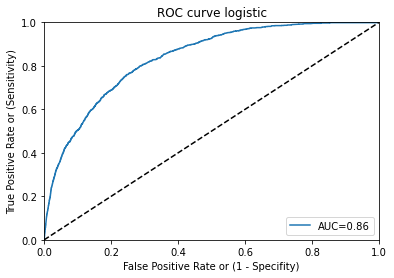

In [171]:
pyplot.plot(rocTraining["False positive rate"], rocTraining["True positive rate"],label='AUC=%0.2f'% aucTest)
pyplot.legend(loc="lower right")
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("ROC curve logistic")

In [ ]:
pyplot.plot(rocTest["False positive rate"], rocTest["True positive rate"],label='AUC=%0.2f'% aucTest)
pyplot.legend(loc="lower right")
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("ROC curve boostedTree of test set")

Text(0.5, 1.0, 'ROC curve logistic')

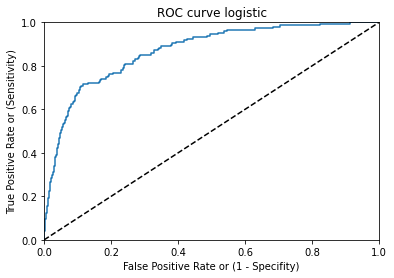

In [156]:
pyplot.plot(rocTest["False positive rate"], rocTest["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("ROC curve logistic")

In [157]:
trainingSet["proba default boostedTree"] = DataFrame(boostedTree.predict_proba(trainingSet[features2]))[1]
testSet["proba default boostedTree"]     = DataFrame(boostedTree.predict_proba(testSet[features2]))[1]

In [158]:
rocTraining = roc(dataSet = trainingSet, actuals = target, probability = "proba default boostedTree")
rocTest     = roc(dataSet = testSet, actuals = target, probability = "proba default boostedTree")

Text(0.5, 1.0, 'ROC curve boostedTree')

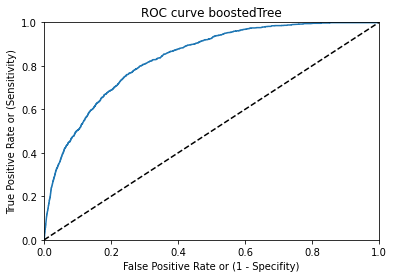

In [159]:
pyplot.plot(rocTraining["False positive rate"], rocTraining["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("ROC curve boostedTree")

Text(0.5, 1.0, 'ROC curve boostedTree')

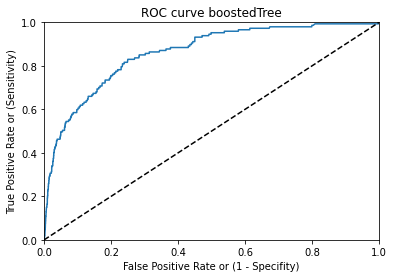

In [160]:
pyplot.plot(rocTest["False positive rate"], rocTest["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("ROC curve boostedTree")

In [66]:
#use model to all data set

In [161]:
predictions_logistic   = logistic.predict(fin[features1])
probabilities_logistic = DataFrame(logistic.predict_proba(fin[features1]))[1]
p_logistic = precision_score(fin[target1], predictions_logistic)
r_logistic = recall_score(fin[target1], predictions_logistic)
f1score_logistic = f1_score(fin[target1], predictions_logistic)
auc_logistic       = roc_auc_score(array(fin[target1]),array(probabilities_logistic))
print(p_logistic)
print(r_logistic)
print(f1score_logistic)
print(auc_logistic)

0.01769249937702467
0.7319587628865979
0.03454987834549878
0.8402656159492006


In [162]:
A = probabilities_logistic.tolist()

In [163]:
fin["proba default logistic"] = A

In [164]:
rocdata = roc(dataSet = fin, actuals = target, probability = "proba default logistic")

Text(0.5, 1.0, 'ROC curve')

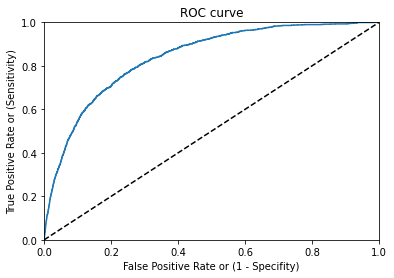

In [165]:
pyplot.plot(rocdata["False positive rate"], rocdata["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("ROC curve")

In [120]:
predictions_boostedTree   = boostedTree.predict(fin[features2])
probabilities_boostedTree = DataFrame(boostedTree.predict_proba(fin[features2]))[1]
p_boostedTree = precision_score(fin[target2], predictions_boostedTree, average='weighted')
r_boostedTree = recall_score(fin[target2], predictions_boostedTree, average='weighted')
f1score_boostedTree = f1_score(fin[target2], predictions_boostedTree, average='weighted')
auc_boostedTree       = roc_auc_score(array(fin[target2]),array(probabilities_boostedTree))
print(p_boostedTree)
print(r_boostedTree)
print(f1score_boostedTree)
print(auc_boostedTree)

0.9907851912427811
0.9776843389430903
0.9839461235468268
0.8398375140830416


In [121]:
score_card = fin[features2]

In [122]:
score_card

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,RACIDLQ,fl_RGVBRSZ_is_missing,RNREVNB,fl_RGKBTA_is_missing,RCASHFL,fl_RGPKAP_is_missing,RDAGLVK,S001053
0,0,0.189089,0.453969,0.949511,0,1,0.693674,0.652385,0.777508,1.000000,0.314610,1,0.836498,0,1.000000,0,0.157895,0.218345
1,0,0.103454,0.000852,0.877239,0,0,0.683051,0.647382,0.644926,0.982044,0.006125,1,0.794180,0,1.000000,0,0.342105,1.000000
2,0,0.072809,0.045390,0.913412,0,1,0.682110,0.645457,0.561876,0.963149,0.005378,1,0.793252,0,0.992051,0,0.171053,0.452642
3,0,0.151825,0.045116,0.913512,0,0,0.684251,0.646577,0.604976,0.968309,0.012250,0,0.795853,0,1.000000,0,1.000000,1.000000
4,0,0.121181,0.301914,0.953628,0,1,0.682908,0.645966,0.552311,0.954083,0.033911,1,0.793855,0,0.991161,0,0.427632,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,1,0.239705,0.022090,0.911873,1,1,0.666210,0.635889,0.642390,0.965896,0.006872,1,0.805475,0,0.990277,1,0.452120,0.186890
44683,0,0.122395,0.031195,0.920005,1,1,0.688853,0.635606,0.642390,0.965896,0.010607,1,0.782096,0,0.990277,1,0.452120,0.186890
44684,0,0.062091,0.004395,0.909687,1,1,0.678278,0.651297,0.642390,0.965896,0.029728,1,0.788844,0,0.990318,1,0.452120,0.186890
44685,0,0.099766,0.161056,0.942144,0,1,0.706779,0.678038,1.000000,1.000000,0.033762,1,0.821401,0,0.993731,0,0.452120,0.026919


In [123]:
A = probabilities_boostedTree.tolist()

In [124]:
score_card['porb'] = A

<ipython-input-124-ee89b30802a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_card['porb'] = A


In [125]:
score_card['default'] = fin['Default_12m'].tolist()

<ipython-input-125-7df6e7be463d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_card['default'] = fin['Default_12m'].tolist()


In [126]:
score_card

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,RACIDLQ,fl_RGVBRSZ_is_missing,RNREVNB,fl_RGKBTA_is_missing,RCASHFL,fl_RGPKAP_is_missing,RDAGLVK,S001053,porb,default
0,0,0.189089,0.453969,0.949511,0,1,0.693674,0.652385,0.777508,1.000000,0.314610,1,0.836498,0,1.000000,0,0.157895,0.218345,0.022964,0.0
1,0,0.103454,0.000852,0.877239,0,0,0.683051,0.647382,0.644926,0.982044,0.006125,1,0.794180,0,1.000000,0,0.342105,1.000000,0.059778,0.0
2,0,0.072809,0.045390,0.913412,0,1,0.682110,0.645457,0.561876,0.963149,0.005378,1,0.793252,0,0.992051,0,0.171053,0.452642,0.029887,0.0
3,0,0.151825,0.045116,0.913512,0,0,0.684251,0.646577,0.604976,0.968309,0.012250,0,0.795853,0,1.000000,0,1.000000,1.000000,0.051642,0.0
4,0,0.121181,0.301914,0.953628,0,1,0.682908,0.645966,0.552311,0.954083,0.033911,1,0.793855,0,0.991161,0,0.427632,1.000000,0.049698,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,1,0.239705,0.022090,0.911873,1,1,0.666210,0.635889,0.642390,0.965896,0.006872,1,0.805475,0,0.990277,1,0.452120,0.186890,0.066592,0.0
44683,0,0.122395,0.031195,0.920005,1,1,0.688853,0.635606,0.642390,0.965896,0.010607,1,0.782096,0,0.990277,1,0.452120,0.186890,0.083144,0.0
44684,0,0.062091,0.004395,0.909687,1,1,0.678278,0.651297,0.642390,0.965896,0.029728,1,0.788844,0,0.990318,1,0.452120,0.186890,0.042667,0.0
44685,0,0.099766,0.161056,0.942144,0,1,0.706779,0.678038,1.000000,1.000000,0.033762,1,0.821401,0,0.993731,0,0.452120,0.026919,0.013208,0.0


In [127]:
score_card[score_card['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,RACIDLQ,fl_RGVBRSZ_is_missing,RNREVNB,fl_RGKBTA_is_missing,RCASHFL,fl_RGPKAP_is_missing,RDAGLVK,S001053,porb,default
159,1,1.000000,0.067291,0.914878,0,1,0.648196,0.637331,0.531715,0.953224,0.000149,1,0.805475,0,0.990232,0,0.452120,0.014955,0.220536,1.0
517,0,0.142527,0.019451,0.891109,0,0,0.683331,0.644504,0.559846,0.957610,0.005826,0,0.794124,0,0.990466,0,0.452120,0.108674,0.221612,1.0
1119,1,0.736957,0.047293,0.913494,0,1,0.660517,0.637190,0.520745,0.965896,0.001494,1,0.805475,0,0.990180,1,0.452120,0.008973,0.252937,1.0
1204,0,0.113279,0.000704,0.894224,0,0,0.687319,0.660704,0.576946,0.958069,0.011951,1,0.804329,0,1.000000,0,0.381579,1.000000,0.135652,1.0
1344,1,0.569488,0.159615,0.923994,0,1,0.655846,0.632489,0.540170,0.965896,0.005079,1,0.805475,0,0.990264,1,0.452120,0.008973,0.262995,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41068,1,0.798727,0.430113,0.963117,0,1,0.609475,0.595041,0.563511,0.965896,0.002988,1,0.805475,0,0.989454,1,1.000000,0.186890,0.321791,1.0
41266,1,0.277610,0.054390,0.889880,0,0,0.660298,0.627879,0.534210,0.952923,0.005527,1,0.805475,0,0.988931,0,0.452120,0.078764,0.802683,1.0
41635,1,0.496358,0.039870,0.924641,0,1,0.599731,0.610919,0.478925,0.945453,0.000448,1,0.805475,0,0.988890,0,0.452120,0.038883,0.424100,1.0
42207,0,0.054166,0.000210,0.909004,1,1,0.676574,0.591358,0.642390,0.965896,0.057514,1,0.770796,0,0.990258,1,0.452120,0.186890,0.049174,1.0


In [128]:
score_card.sort_values(by="porb" , ascending=False)

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,RACIDLQ,fl_RGVBRSZ_is_missing,RNREVNB,fl_RGKBTA_is_missing,RCASHFL,fl_RGPKAP_is_missing,RDAGLVK,S001053,porb,default
156523,1,0.466538,0.021144,0.810741,0,0,0.604177,0.610063,0.539265,0.965896,0.002540,1,0.805475,0,0.989918,1,0.407895,0.069791,0.929987,0.0
23722,1,0.267510,0.185533,0.853889,0,0,0.661948,0.628523,0.539905,0.965896,0.010308,1,0.805475,0,0.989955,1,0.335526,0.111665,0.923631,0.0
147887,1,0.548944,0.035874,0.912364,0,1,0.650187,0.631079,0.541185,0.965896,0.001942,1,0.805475,0,0.990161,1,0.710526,0.088734,0.914908,0.0
130296,1,0.693624,0.003943,0.882530,0,0,0.620166,0.618781,0.537845,0.965896,0.007171,1,0.805475,0,0.988764,1,0.736842,0.046859,0.897740,0.0
100566,1,0.280587,0.062265,0.877995,0,0,0.658505,0.631697,0.541910,0.953531,0.004183,1,0.805475,0,0.989906,0,0.578947,0.064806,0.896542,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148059,0,0.076153,0.005383,0.990893,0,1,0.888473,0.660376,0.643726,0.976972,0.000448,1,0.803679,0,0.990665,0,0.452120,0.008973,0.004265,0.0
30777,0,0.156223,0.007886,0.965048,0,1,0.695931,0.644678,1.000000,1.000000,0.000149,1,0.797130,0,0.991273,0,0.452120,0.006979,0.003973,0.0
238785,0,0.177225,0.273708,0.938568,0,1,0.684797,0.649037,1.000000,0.993990,0.005826,1,0.801245,1,0.991074,0,0.452120,0.008973,0.003926,0.0
227339,0,0.163987,0.023615,0.974728,0,1,0.683017,0.659777,1.000000,1.000000,0.000299,1,0.796353,0,1.000000,0,1.000000,1.000000,0.003819,0.0


In [129]:
AAA = score_card[score_card['porb'] < 0.05]

In [130]:
AAA

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,RACIDLQ,fl_RGVBRSZ_is_missing,RNREVNB,fl_RGKBTA_is_missing,RCASHFL,fl_RGPKAP_is_missing,RDAGLVK,S001053,porb,default
0,0,0.189089,0.453969,0.949511,0,1,0.693674,0.652385,0.777508,1.000000,0.314610,1,0.836498,0,1.000000,0,0.157895,0.218345,0.022964,0.0
2,0,0.072809,0.045390,0.913412,0,1,0.682110,0.645457,0.561876,0.963149,0.005378,1,0.793252,0,0.992051,0,0.171053,0.452642,0.029887,0.0
4,0,0.121181,0.301914,0.953628,0,1,0.682908,0.645966,0.552311,0.954083,0.033911,1,0.793855,0,0.991161,0,0.427632,1.000000,0.049698,0.0
5,0,0.095644,0.158900,0.943337,0,0,0.681660,0.650215,0.559331,0.962134,0.036749,1,0.798176,0,1.000000,0,0.500000,1.000000,0.034928,0.0
6,0,0.000687,0.116076,0.986586,0,1,0.681701,0.800730,0.641021,0.965896,0.724679,1,0.792895,0,0.990443,1,0.452120,0.186890,0.016950,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44678,0,0.019903,0.735790,0.977151,1,1,0.620561,0.484202,0.642390,0.965896,0.158948,1,0.771225,0,0.990216,1,0.452120,0.186890,0.018116,0.0
44679,0,0.139595,0.238240,0.978854,1,1,0.695140,0.656223,0.642390,0.965896,0.012250,1,0.811981,0,0.991117,1,0.452120,0.186890,0.018778,0.0
44680,0,0.003733,0.180055,0.936152,1,1,0.673117,0.493751,0.642390,0.965896,0.641918,1,0.786853,0,0.990282,1,0.452120,0.186890,0.041263,0.0
44684,0,0.062091,0.004395,0.909687,1,1,0.678278,0.651297,0.642390,0.965896,0.029728,1,0.788844,0,0.990318,1,0.452120,0.186890,0.042667,0.0


In [131]:
AAA[AAA['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,RACIDLQ,fl_RGVBRSZ_is_missing,RNREVNB,fl_RGKBTA_is_missing,RCASHFL,fl_RGPKAP_is_missing,RDAGLVK,S001053,porb,default
3418,0,0.157963,0.271002,0.966969,0,1,0.683522,0.658650,0.560051,0.953047,0.007469,1,0.794093,0,0.990381,0,0.452120,0.068794,0.038754,1.0
3617,0,0.087948,0.928914,0.989445,1,1,0.111316,0.453959,0.642390,0.965896,0.039588,1,0.647837,0,0.990115,1,0.452120,0.186890,0.042977,1.0
4409,0,0.038317,0.153464,0.946415,1,1,0.728570,0.806126,0.642390,0.965896,0.031969,1,0.817643,0,0.990582,1,0.452120,0.186890,0.018386,1.0
7147,0,0.017842,0.064946,0.914614,1,1,0.660019,0.448318,0.642390,0.965896,0.471019,1,0.795908,0,0.990949,1,0.452120,0.186890,0.048672,1.0
14736,0,0.119005,0.289412,0.937518,0,1,0.686290,0.648516,0.556466,0.954776,0.009262,1,0.794545,0,0.993152,0,0.078947,1.000000,0.040826,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28676,1,0.288283,0.026075,0.968527,1,1,0.684735,0.646996,0.642390,0.965896,0.000896,1,0.805475,0,0.990423,1,0.452120,0.186890,0.047741,1.0
31398,0,0.054143,0.389738,0.943127,1,1,0.728611,0.732227,0.642390,0.965896,0.062295,1,0.826182,0,0.990577,1,0.452120,0.186890,0.023370,1.0
36876,0,0.172186,0.000000,0.938568,0,1,0.687285,0.648734,0.571011,0.956419,0.014789,1,0.802014,0,0.990402,0,0.452120,0.018943,0.041633,1.0
42207,0,0.054166,0.000210,0.909004,1,1,0.676574,0.591358,0.642390,0.965896,0.057514,1,0.770796,0,0.990258,1,0.452120,0.186890,0.049174,1.0


In [132]:
AA = score_card[0.05 < score_card['porb']]
AA = AA[AA['porb']< 0.1]

In [133]:
AA

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,RACIDLQ,fl_RGVBRSZ_is_missing,RNREVNB,fl_RGKBTA_is_missing,RCASHFL,fl_RGPKAP_is_missing,RDAGLVK,S001053,porb,default
1,0,0.103454,0.000852,0.877239,0,0,0.683051,0.647382,0.644926,0.982044,0.006125,1,0.794180,0,1.000000,0,0.342105,1.000000,0.059778,0.0
3,0,0.151825,0.045116,0.913512,0,0,0.684251,0.646577,0.604976,0.968309,0.012250,0,0.795853,0,1.000000,0,1.000000,1.000000,0.051642,0.0
7,1,0.170537,0.691610,0.981613,0,1,0.681960,0.646236,0.504950,0.949039,0.020765,1,0.805475,0,0.991029,0,0.335526,0.840479,0.093772,0.0
12,0,0.132449,0.207444,0.952744,0,0,0.682751,0.663937,0.589936,0.960103,0.032118,1,0.793038,0,1.000000,0,0.434211,1.000000,0.056282,0.0
14,0,0.160185,0.048249,0.919978,0,1,0.682403,0.645509,0.552706,0.957019,0.022856,1,0.792015,0,1.000000,0,0.802632,1.000000,0.060034,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44671,0,0.171774,0.273708,0.859991,1,0,0.685608,0.651548,0.642390,0.965896,0.016582,1,0.803505,1,0.990402,1,0.452120,0.186890,0.068495,0.0
44675,0,0.144061,0.469078,0.956123,0,0,0.696135,0.654523,0.553511,0.952892,0.021811,1,0.809983,0,0.990586,0,0.452120,0.492522,0.063439,0.0
44681,1,0.302185,0.176007,0.954429,1,1,0.709547,0.661071,0.642390,0.965896,0.004631,1,0.805475,0,0.990370,1,0.452120,0.186890,0.061583,0.0
44682,1,0.239705,0.022090,0.911873,1,1,0.666210,0.635889,0.642390,0.965896,0.006872,1,0.805475,0,0.990277,1,0.452120,0.186890,0.066592,0.0


In [134]:
AA[AA['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,RACIDLQ,fl_RGVBRSZ_is_missing,RNREVNB,fl_RGKBTA_is_missing,RCASHFL,fl_RGPKAP_is_missing,RDAGLVK,S001053,porb,default
2368,0,0.218245,0.019693,0.910716,0,1,0.740352,0.691881,0.602556,0.961579,0.010308,1,1.000000,0,0.994608,0,0.256579,0.372881,0.065012,1.0
3702,1,1.000000,0.006950,0.909696,1,1,0.743202,0.647382,0.642390,0.965896,0.000598,1,0.805475,0,0.990494,1,0.452120,0.186890,0.060739,1.0
4484,1,1.000000,0.205520,0.926790,1,1,0.735716,0.568590,0.642390,0.965896,0.002540,1,0.805475,0,0.989437,1,0.452120,0.186890,0.098424,1.0
5033,1,0.263181,0.033372,0.887375,0,0,0.752086,0.662636,1.000000,1.000000,0.006274,0,0.805475,0,0.973459,0,1.000000,0.011964,0.083486,1.0
7313,0,0.155582,0.000074,0.906627,1,0,0.684667,0.645257,0.642390,0.965896,0.012847,1,0.791595,0,0.990410,1,0.452120,0.186890,0.086037,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32515,1,0.341945,0.046662,0.950941,1,1,0.675755,0.632348,0.642390,0.965896,0.000896,1,0.805475,0,0.990086,1,0.452120,0.186890,0.083825,1.0
34176,0,0.048005,0.001798,0.909141,0,1,0.696735,0.688791,0.638206,0.965896,0.070959,1,0.807763,0,0.990512,1,0.452120,0.186890,0.071678,1.0
34584,0,0.210710,0.016886,0.904906,1,0,0.686515,0.644936,0.642390,0.965896,0.013295,1,0.825302,0,0.990313,1,0.452120,0.186890,0.079241,1.0
34685,0,0.068801,0.273708,0.905425,1,0,0.674630,0.601441,0.642390,0.965896,0.038841,1,0.770995,1,0.990273,1,0.000000,0.186890,0.067861,1.0


In [103]:
A = score_card[0.1 < score_card['porb']]
A = A[A['porb']< 0.2]

In [104]:
A

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
1,0,0.103454,0.000852,0.877239,0,0,0.683051,0.647382,0.644926,0.982044,...,0,0.342105,1.000000,1.000000,0.436472,0,0,0,0.146526,0.0
5,0,0.095644,0.158900,0.943337,0,0,0.681660,0.650215,0.559331,0.962134,...,0,0.500000,1.000000,1.000000,0.159948,0,0,0,0.146348,0.0
7,1,0.170537,0.691610,0.981613,0,1,0.681960,0.646236,0.504950,0.949039,...,0,0.335526,0.840479,0.115154,0.306214,0,1,0,0.149810,0.0
12,0,0.132449,0.207444,0.952744,0,0,0.682751,0.663937,0.589936,0.960103,...,0,0.434211,1.000000,1.000000,0.126765,0,0,0,0.120794,0.0
14,0,0.160185,0.048249,0.919978,0,1,0.682403,0.645509,0.552706,0.957019,...,0,0.802632,1.000000,1.000000,0.306214,0,0,0,0.192394,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44658,0,0.070954,0.212070,0.939293,1,1,0.689419,0.673640,0.642390,0.965896,...,1,0.452120,0.186890,0.001946,0.306214,1,0,0,0.125963,0.0
44660,0,0.128991,0.233130,0.935787,0,1,0.679662,0.662102,0.998570,0.965896,...,1,0.452120,0.186890,0.001047,0.306214,1,0,0,0.183407,0.0
44665,0,0.193624,0.500915,0.964920,0,1,0.696810,0.668090,0.579421,0.966507,...,0,0.452120,0.018943,0.003185,0.306214,1,0,0,0.166235,0.0
44674,0,0.179676,0.240658,0.947016,1,1,0.686856,0.665385,0.642390,0.965896,...,1,0.452120,0.186890,0.007006,0.306214,1,0,0,0.144235,0.0


In [105]:
A[A['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
3617,0,0.087948,0.928914,0.989445,1,1,0.111316,0.453959,0.642390,0.965896,...,1,0.452120,0.186890,0.001202,0.306214,1,0,0,0.134736,1.0
7411,0,0.200082,0.033498,0.912565,0,1,0.684237,0.643757,0.555201,0.958823,...,0,0.381579,1.000000,1.000000,0.306214,0,0,0,0.132071,1.0
12104,0,0.145390,0.005919,0.909496,0,1,0.683078,0.643699,0.596301,0.969749,...,0,0.585526,0.820538,1.000000,0.306214,0,0,0,0.128886,1.0
14736,0,0.119005,0.289412,0.937518,0,1,0.686290,0.648516,0.556466,0.954776,...,0,0.078947,1.000000,0.425510,0.306214,0,0,0,0.182467,1.0
22447,0,0.219298,0.002061,0.909177,0,1,0.681517,0.642598,0.544535,0.956738,...,0,0.452120,0.064806,0.612916,0.306214,1,0,0,0.157320,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,0,0.207892,0.069856,0.859299,0,1,0.669653,0.630519,0.541070,0.954126,...,0,0.203947,1.000000,1.000000,0.306214,0,0,0,0.127674,1.0
9809,0,0.045371,0.020923,0.984837,0,1,0.684674,0.657845,1.000000,0.959874,...,0,0.452120,0.008973,0.032416,0.306214,1,0,0,0.117562,1.0
12667,0,0.123059,0.115077,0.918958,1,1,0.707686,0.709878,0.642390,0.965896,...,1,0.452120,0.186890,0.000436,0.306214,1,0,0,0.154028,1.0
24422,0,0.159292,0.045390,0.913020,1,1,0.708211,0.665038,0.642390,0.965896,...,1,0.452120,0.186890,0.004173,0.306214,1,0,0,0.195052,1.0


In [106]:
BBB = score_card[0.2 < score_card['porb']]
BBB = BBB[BBB['porb']< 0.3]
BBB

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
6,0,0.000687,0.116076,0.986586,0,1,0.681701,0.800730,0.641021,0.965896,...,1,0.452120,0.186890,0.128757,0.306214,1,0,0,0.294018,0.0
17,0,0.145321,0.048176,0.898303,0,0,0.682922,0.646217,0.572426,0.965359,...,0,0.671053,1.000000,1.000000,0.653762,0,0,0,0.214900,0.0
18,0,0.203449,0.014909,0.934030,0,0,0.685192,0.650209,0.640506,0.980433,...,0,0.677632,1.000000,1.000000,0.208267,0,0,0,0.235468,0.0
24,0,0.141633,0.044559,0.935851,0,0,0.682151,0.644955,0.608156,0.977308,...,0,0.546053,1.000000,1.000000,0.076263,0,0,0,0.206685,0.0
42,0,0.101186,0.242929,0.950085,0,1,0.682396,0.642128,0.647656,0.978772,...,0,0.452120,0.052841,0.053120,0.306214,1,0,0,0.214335,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44664,0,0.188837,0.007970,0.945714,0,1,0.686583,0.649430,1.000000,0.965896,...,1,0.452120,0.186890,0.010802,0.306214,1,0,0,0.293153,0.0
44666,0,0.216092,0.127852,0.964301,1,1,0.684858,0.639714,0.642390,0.965896,...,1,0.452120,0.186890,0.015119,0.306214,1,0,0,0.201240,0.0
44680,0,0.003733,0.180055,0.936152,1,1,0.673117,0.493751,0.642390,0.965896,...,1,0.452120,0.186890,0.004325,0.306214,1,0,0,0.215582,0.0
44683,0,0.122395,0.031195,0.920005,1,1,0.688853,0.635606,0.642390,0.965896,...,1,0.452120,0.186890,0.003420,0.306214,1,0,0,0.235685,0.0


In [107]:
BBB[BBB['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
3418,0,0.157963,0.271002,0.966969,0,1,0.683522,0.658650,0.560051,0.953047,...,0,0.452120,0.068794,0.003150,0.306214,1,0,0,0.292315,1.0
7147,0,0.017842,0.064946,0.914614,1,1,0.660019,0.448318,0.642390,0.965896,...,1,0.452120,0.186890,0.014806,0.306214,1,0,0,0.275395,1.0
9625,1,0.558403,0.369635,0.945714,0,1,0.681565,0.644060,0.564146,0.959122,...,0,0.052632,1.000000,1.000000,0.306214,0,0,0,0.236607,1.0
26094,0,0.023201,0.002797,0.909232,1,1,0.679860,0.667265,0.642390,0.965896,...,1,0.452120,0.186890,0.013158,0.306214,1,0,0,0.204036,1.0
31995,0,0.205327,0.025171,0.911244,1,1,0.694554,0.646191,0.642390,0.965896,...,1,0.085526,0.186890,0.006262,0.306214,0,0,0,0.263546,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24547,0,0.195227,0.057134,0.917819,0,1,0.703861,0.669583,0.608961,0.959079,...,0,0.452120,0.008973,0.002440,0.306214,1,0,0,0.294053,1.0
25327,0,0.142618,0.066712,0.966523,1,1,0.651721,0.632109,0.642390,0.965896,...,1,0.452120,0.186890,0.000410,0.306214,1,0,0,0.266772,1.0
38617,0,0.225299,0.383871,0.947909,0,0,0.725993,0.672835,0.557681,0.955008,...,0,0.452120,0.114656,0.002942,0.000582,1,0,0,0.273524,1.0
39046,0,0.189684,0.612459,0.962033,0,1,0.704570,0.648129,0.552941,0.965896,...,1,0.452120,0.038883,0.001435,0.306214,1,0,0,0.209337,1.0


In [108]:
BB = score_card[0.3 < score_card['porb']]
BB = BB[BB['porb']< 0.4]
BB

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
25,1,0.157921,0.273708,0.938568,1,1,0.701015,0.671942,0.642390,0.965896,...,1,0.452120,0.186890,0.151621,0.306214,1,1,1,0.363958,0.0
31,0,0.190234,0.010567,0.893595,0,0,0.681660,0.645470,0.554921,0.957685,...,0,0.789474,1.000000,1.000000,0.279144,0,0,0,0.358531,0.0
32,0,0.051234,0.376564,0.978799,0,1,0.682069,0.662584,0.635376,0.979189,...,0,1.000000,0.065803,0.098048,0.306214,0,0,0,0.342479,0.0
43,1,0.157921,0.273708,0.938568,1,1,0.701015,0.671942,0.642390,0.965896,...,1,0.452120,0.186890,0.151621,0.306214,1,1,1,0.363958,0.0
63,1,0.165980,0.143087,0.942636,0,1,0.701015,0.648136,0.559451,0.958696,...,0,0.664474,0.230309,0.121368,0.306214,0,1,0,0.389702,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44621,0,0.201296,0.192167,0.978089,0,1,0.685253,0.646043,0.559741,0.952344,...,0,0.452120,0.083749,0.010671,0.306214,1,0,0,0.348957,0.0
44628,0,0.170377,0.319167,0.968299,0,1,0.689978,0.652076,0.572711,0.965896,...,1,0.452120,0.018943,0.010003,0.306214,1,0,0,0.326691,0.0
44657,0,0.147199,0.029366,0.925752,1,0,0.689242,0.655115,0.642390,0.965896,...,1,0.452120,0.186890,0.042738,0.014263,1,0,0,0.352045,0.0
44668,0,0.152146,0.223667,0.948874,0,0,0.697035,0.658554,0.761178,0.965896,...,1,0.452120,0.008973,0.016865,0.294717,1,0,0,0.378830,0.0


In [109]:
BB[BB['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
1204,0,0.113279,0.000704,0.894224,0,0,0.687319,0.660704,0.576946,0.958069,...,0,0.381579,1.000000,0.684386,0.373308,0,0,0,0.362857,1.0
2368,0,0.218245,0.019693,0.910716,0,1,0.740352,0.691881,0.602556,0.961579,...,0,0.256579,0.372881,0.041985,0.306214,0,0,0,0.372668,1.0
7313,0,0.155582,0.000074,0.906627,1,0,0.684667,0.645257,0.642390,0.965896,...,1,0.452120,0.186890,0.077445,0.045699,1,0,0,0.377118,1.0
10106,0,0.119784,0.006193,0.909842,0,1,0.701324,0.677845,0.824198,0.965896,...,1,0.452120,0.186890,0.007301,0.306214,1,0,0,0.349653,1.0
16663,0,0.125624,0.002891,0.903321,1,0,0.688233,0.656886,0.642390,0.965896,...,1,0.452120,0.186890,0.015425,0.103187,1,0,0,0.386611,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,0,0.137465,0.355883,0.942645,0,1,0.685267,0.615355,0.538275,0.952871,...,0,0.328947,1.000000,0.151861,0.306214,0,0,0,0.368045,1.0
6283,0,0.174293,0.000000,0.864034,1,0,0.684135,0.642933,0.642390,0.965896,...,1,0.452120,0.186890,0.002924,0.923155,1,0,0,0.361220,1.0
15060,0,0.162567,0.028462,0.872622,1,0,0.708967,0.657839,0.642390,0.965896,...,1,0.452120,0.186890,0.002533,0.340853,1,0,0,0.359643,1.0
17894,0,0.071733,0.029366,0.911490,1,0,0.714020,0.690040,0.642390,0.965896,...,1,0.452120,0.186890,0.004155,0.055596,1,0,0,0.307976,1.0


In [110]:
B = score_card[0.4 < score_card['porb']]
B = B[B['porb']< 0.5]
B

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
4,0,0.121181,0.301914,0.953628,0,1,0.682908,0.645966,0.552311,0.954083,...,0,0.427632,1.000000,0.212939,0.306214,0,0,0,0.402860,0.0
22,0,0.094407,0.078162,0.933520,0,1,0.681503,0.645798,0.568371,0.960685,...,0,1.000000,0.258225,0.445783,0.306214,0,0,0,0.410916,0.0
47,1,0.266960,0.090316,0.953072,1,1,0.681660,0.644420,0.642390,0.965896,...,1,0.452120,0.186890,0.109146,0.306214,1,0,0,0.440742,0.0
64,0,0.140534,0.282915,0.974592,0,0,0.676867,0.647311,0.554801,0.958538,...,0,0.125000,1.000000,0.266392,0.098530,0,0,0,0.448683,0.0
87,0,0.049860,0.056703,0.894114,0,0,0.682444,0.660563,0.576351,0.961794,...,0,0.993421,0.579262,0.714491,0.388735,0,0,0,0.401242,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44669,0,0.121135,0.273708,0.904441,1,0,0.692140,0.660054,0.642390,0.965896,...,1,0.452120,0.186890,0.026783,0.017465,1,0,0,0.432081,0.0
44671,0,0.171774,0.273708,0.859991,1,0,0.685608,0.651548,0.642390,0.965896,...,1,0.452120,0.186890,0.006629,0.878620,1,0,0,0.409580,0.0
44673,0,0.155650,0.147934,0.935195,0,1,0.697083,0.669719,0.566631,0.955990,...,0,0.452120,0.733799,0.064970,0.306214,1,0,0,0.416695,0.0
44681,1,0.302185,0.176007,0.954429,1,1,0.709547,0.661071,0.642390,0.965896,...,1,0.452120,0.186890,0.001218,0.306214,1,0,0,0.474350,0.0


In [111]:
B[B['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
1434,0,0.069351,0.019430,0.911108,0,1,0.673805,0.697889,0.533840,0.953908,...,0,0.452120,0.148554,0.061983,0.306214,1,0,0,0.412903,1.0
1651,0,0.188654,0.254127,0.918375,0,0,0.678551,0.640815,0.545580,0.953660,...,0,0.452120,0.133599,0.095965,0.262262,1,0,0,0.478855,1.0
1858,0,0.133503,0.000063,0.796261,0,0,0.681646,0.646371,0.695272,0.958129,...,0,0.452120,0.028913,0.070149,1.000000,1,0,0,0.474806,1.0
8573,0,0.178324,0.061834,0.916116,0,1,0.682765,0.645167,0.560811,0.956660,...,0,0.452120,0.157527,0.047614,0.306214,1,0,0,0.453700,1.0
16340,0,0.166232,0.499211,0.952753,0,1,0.622811,0.605066,0.530140,0.965896,...,1,0.452120,0.042871,0.004159,0.306214,1,0,0,0.434652,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34176,0,0.048005,0.001798,0.909141,0,1,0.696735,0.688791,0.638206,0.965896,...,1,0.452120,0.186890,0.009775,0.306214,1,0,0,0.463358,1.0
34584,0,0.210710,0.016886,0.904906,1,0,0.686515,0.644936,0.642390,0.965896,...,1,0.452120,0.186890,0.001651,0.096056,1,0,0,0.423793,1.0
34685,0,0.068801,0.273708,0.905425,1,0,0.674630,0.601441,0.642390,0.965896,...,1,0.000000,0.186890,0.001168,0.148741,0,0,0,0.450443,1.0
40743,0,0.075787,0.118368,0.921061,0,1,0.687122,0.659378,0.574301,0.965896,...,1,0.032895,0.186890,0.003056,0.306214,0,0,0,0.464927,1.0


In [112]:
CCC = score_card[0.5 < score_card['porb']]
CCC = CCC[CCC['porb']< 0.6]
CCC

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
21,0,0.092598,0.049259,0.930824,0,0,0.679908,0.641034,0.550421,0.955738,...,0,0.907895,1.000000,0.669445,0.020375,0,0,0,0.563490,0.0
55,0,0.001260,0.279308,0.933183,0,1,0.680201,0.463121,0.549250,0.965896,...,1,0.452120,0.186890,0.032124,0.306214,1,0,0,0.540942,0.0
151,0,0.140557,0.720986,0.977333,0,1,0.674324,0.644620,0.551191,0.959631,...,0,0.210526,0.726820,0.163773,0.306214,0,0,0,0.557387,0.0
162,0,0.215909,0.084082,0.926489,0,1,0.679833,0.645567,0.556146,0.955070,...,0,0.452120,0.096710,0.012896,0.306214,1,0,0,0.524154,0.0
168,0,0.095300,0.099926,0.912920,0,0,0.682287,0.652636,0.563386,0.959945,...,0,0.250000,0.134596,0.118229,0.198079,0,0,0,0.544539,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44470,0,0.079680,0.091767,0.916699,0,0,0.691431,0.671837,0.592071,0.962941,...,0,0.452120,0.030907,0.014355,0.069568,1,0,0,0.505876,0.0
44500,0,0.074321,0.273708,0.938568,1,1,0.737243,0.676795,0.642390,0.965896,...,1,0.452120,0.186890,0.013719,0.306214,1,0,1,0.511651,0.0
44511,0,0.157116,0.205057,0.930177,0,1,0.651571,0.641935,0.542765,0.965896,...,1,0.452120,0.008973,0.000732,0.306214,1,0,0,0.514859,0.0
44578,0,0.191860,0.068153,0.897484,0,0,0.688342,0.651059,0.588031,0.959358,...,0,0.452120,0.151545,0.068532,0.314365,1,0,0,0.558696,0.0


In [113]:
CCC[CCC['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
1380,0,0.209106,0.007444,0.883459,0,0,0.683508,0.642418,0.558931,0.955382,...,0,0.664474,0.904287,0.582405,0.462087,0,0,0,0.589028,1.0
1704,0,0.210160,0.321522,0.877658,0,0,0.682178,0.642939,0.567211,0.962849,...,0,0.565789,0.093719,0.746978,1.000000,0,0,0,0.513111,1.0
8214,0,0.186020,0.007097,0.910816,0,1,0.682594,0.642862,0.561051,0.965896,...,1,0.452120,0.018943,0.016301,0.306214,1,0,0,0.598243,1.0
9962,0,0.156498,0.115813,0.909978,0,0,0.680883,0.651291,0.570266,0.958576,...,0,0.452120,0.099701,0.050041,0.277398,1,0,0,0.543944,1.0
13117,1,0.436947,0.249133,0.933583,1,1,0.655416,0.623726,0.642390,0.965896,...,1,0.452120,0.186890,0.000498,0.306214,1,0,0,0.576734,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,0,0.209771,0.061771,0.914951,0,1,0.681074,0.649803,0.551996,0.952951,...,0,0.452120,0.058824,0.005683,0.306214,1,0,0,0.517576,1.0
17365,1,0.292222,0.109053,0.918430,1,1,0.695958,0.652585,0.642390,0.965896,...,1,0.452120,0.186890,0.003722,0.306214,1,0,0,0.548438,1.0
19605,0,0.190646,0.035475,0.896209,0,0,0.683003,0.632959,0.879524,0.965896,...,1,0.452120,0.006979,0.016578,0.307961,1,0,0,0.526834,1.0
28676,1,0.288283,0.026075,0.968527,1,1,0.684735,0.646996,0.642390,0.965896,...,1,0.452120,0.186890,0.009890,0.306214,1,0,0,0.557341,1.0


In [114]:
CC = score_card[0.6 < score_card['porb']]
CC = CC[CC['porb']< 0.7]
CC

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
9,1,0.228757,0.023636,0.911053,0,1,0.681906,0.671942,0.559321,0.968802,...,0,0.361842,1.000000,0.629165,0.306214,0,0,0,0.607514,0.0
13,0,0.191631,0.058732,0.928766,0,1,0.658021,0.620494,0.492665,0.947301,...,0,0.651316,1.000000,1.000000,0.306214,0,0,0,0.618069,0.0
77,0,0.187188,0.005888,0.911845,0,1,0.681694,0.646159,0.578766,0.964645,...,0,0.664474,1.000000,1.000000,0.306214,0,0,0,0.625686,0.0
103,0,0.113806,0.077027,0.920215,0,0,0.677610,0.636230,0.539875,0.954551,...,0,0.947368,1.000000,0.547136,0.257313,0,0,0,0.652501,0.0
114,0,0.113394,0.267070,0.942372,0,1,0.686051,0.644916,0.515280,0.949994,...,0,1.000000,1.000000,0.199150,0.306214,0,0,0,0.654354,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44613,1,0.487335,0.389864,0.938319,1,0,0.736861,0.658412,0.642390,0.965896,...,1,0.452120,0.186890,0.000606,0.039587,1,0,0,0.646390,0.0
44615,0,0.180638,0.099348,0.906645,0,0,0.685342,0.651445,0.565556,0.965896,...,1,0.452120,0.008973,0.005940,0.282928,1,0,0,0.672577,0.0
44619,0,0.136160,0.041615,0.912756,0,1,0.686385,0.653576,0.563856,0.960685,...,0,0.625000,0.134596,0.052484,0.306214,0,0,0,0.617462,0.0
44632,1,0.237140,0.002061,0.909277,1,1,0.674685,0.643628,0.642390,0.965896,...,1,0.452120,0.186890,0.001871,0.306214,1,0,0,0.600890,0.0


In [115]:
CC[CC['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
2700,0,0.210183,0.031490,0.903922,0,0,0.684490,0.650486,0.562411,0.958004,...,0,0.452120,0.018943,0.006372,0.135643,1,0,0,0.667712,1.0
2710,0,0.126494,0.016423,0.893877,0,0,0.679669,0.631272,0.550426,0.957478,...,0,0.452120,0.186890,0.013271,0.468927,1,0,0,0.647987,1.0
6762,1,0.239797,0.442551,0.950058,0,1,0.579986,0.598054,0.535250,0.954281,...,0,0.452120,0.044865,0.002829,0.306214,1,0,0,0.621555,1.0
7489,0,0.144863,0.109368,0.918548,0,1,0.639312,0.588641,0.490115,0.947163,...,0,0.256579,0.031904,0.008239,0.306214,0,0,0,0.671447,1.0
8498,0,0.194723,0.107759,0.905880,0,0,0.677003,0.639887,0.543975,0.959878,...,0,0.452120,0.084646,0.025244,0.235482,1,0,0,0.652848,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21701,0,0.152512,0.036021,0.874580,0,0,0.696190,0.653679,0.571476,0.965896,...,1,0.452120,0.186890,0.027798,0.786348,1,0,0,0.645948,1.0
22837,0,0.174339,0.075513,0.916444,0,0,0.691049,0.660337,0.587536,0.965896,...,1,0.452120,0.186890,0.006334,0.119924,1,0,0,0.690876,1.0
28537,0,0.121135,0.002376,0.909232,1,1,0.700670,0.689422,0.642390,0.965896,...,1,0.452120,0.186890,0.004235,0.306214,1,0,0,0.655929,1.0
32515,1,0.341945,0.046662,0.950941,1,1,0.675755,0.632348,0.642390,0.965896,...,1,0.452120,0.186890,0.006533,0.306214,1,0,0,0.606078,1.0


In [116]:
C = score_card[0.7 < score_card['porb']]
C = C[C['porb']< 0.8]
C

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
3,0,0.151825,0.045116,0.913512,0,0,0.684251,0.646577,0.604976,0.968309,...,0,1.000000,1.000000,1.000000,0.252802,0,0,0,0.785678,0.0
26,1,1.000000,0.368741,0.528054,1,0,0.681006,0.642225,0.642390,0.965896,...,1,1.000000,0.186890,1.000000,0.740649,0,0,0,0.765864,0.0
46,0,0.151825,0.064452,0.921990,0,0,0.683187,0.657214,0.629096,0.981492,...,0,1.000000,1.000000,1.000000,0.074079,0,0,0,0.774080,0.0
174,0,0.144382,0.019893,0.888158,0,0,0.673805,0.632013,0.540385,0.965896,...,1,0.452120,0.018943,0.005936,0.689419,1,0,0,0.716089,0.0
194,0,0.092392,0.273708,0.938568,0,1,0.682669,0.651400,0.572976,0.959766,...,0,0.452120,0.184447,0.036069,0.306214,1,0,1,0.788609,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44388,1,0.268380,0.119945,0.931015,0,1,0.681953,0.647015,0.559621,0.955194,...,0,0.452120,0.160419,0.031393,0.306214,1,0,0,0.750622,0.0
44446,1,0.347465,0.070834,0.939567,0,1,0.672803,0.646809,1.000000,0.965896,...,1,0.480263,0.186890,0.003553,0.306214,0,0,0,0.782887,0.0
44599,0,0.206175,0.058480,0.878833,1,0,0.649450,0.607024,0.642390,0.965896,...,1,0.452120,0.186890,0.001535,0.586669,1,0,0,0.759587,0.0
44635,0,0.227566,0.057470,0.913967,0,1,0.679471,0.639038,0.550986,0.969088,...,0,0.703947,0.109671,0.038612,0.306214,0,0,0,0.714652,0.0


In [117]:
C[C['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
1565,0,0.157689,0.129072,0.920561,0,0,0.671214,0.631961,0.542075,0.965896,...,1,0.452120,0.018943,0.009274,0.010188,1,0,0,0.724077,1.0
3976,0,0.165476,0.009557,0.891555,0,0,0.673369,0.630886,0.542265,0.954709,...,0,0.452120,0.038883,0.007944,0.271285,1,0,0,0.705053,1.0
5968,0,0.150108,0.004700,0.879662,0,0,0.684503,0.643905,0.601861,0.970731,...,0,0.921053,0.015952,0.039274,0.698879,0,0,0,0.799109,1.0
7523,0,0.184073,0.020345,0.911290,0,0,0.660823,0.619431,0.564576,0.955770,...,0,0.452120,0.058824,0.019804,0.001019,1,0,0,0.796483,1.0
12204,0,0.188012,0.009736,0.891546,0,0,0.689972,0.656719,0.610541,0.962768,...,0,0.677632,0.047856,0.032221,0.324116,0,0,0,0.766137,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33223,0,0.208282,0.000021,0.902948,0,0,0.697179,0.660131,0.584336,0.965896,...,1,0.348684,0.186890,0.019453,0.087469,0,0,0,0.739903,1.0
33415,1,0.799070,0.353296,0.965867,0,1,0.674746,0.646597,1.000000,0.965896,...,1,0.452120,0.186890,0.000940,0.306214,1,0,0,0.749986,1.0
33910,1,0.296734,0.104700,0.923712,0,1,0.676567,0.644981,0.565771,0.952719,...,0,0.452120,0.037886,0.008512,0.306214,1,0,0,0.772057,1.0
36876,0,0.172186,0.000000,0.938568,0,1,0.687285,0.648734,0.571011,0.956419,...,0,0.452120,0.018943,0.009694,0.306214,1,0,1,0.770528,1.0


In [118]:
D = score_card[score_card['porb'] > 0.8]
D

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
108,0,0.207434,0.272327,0.945286,0,1,0.610341,0.545597,0.522060,0.954030,...,0,0.493421,0.078764,0.162215,0.306214,0,0,0,0.899545,0.0
159,1,1.000000,0.067291,0.914878,0,1,0.648196,0.637331,0.531715,0.953224,...,0,0.452120,0.014955,0.001175,0.306214,1,0,0,0.967842,1.0
214,1,0.234117,0.020429,0.910798,0,1,0.678408,0.640834,0.548015,0.957478,...,0,0.703947,0.882353,0.360891,0.306214,0,0,0,0.856684,0.0
221,1,0.233613,0.058269,0.886856,0,0,0.681203,0.643435,0.544435,0.954839,...,0,0.452120,0.098704,0.049095,0.485664,1,0,0,0.852060,0.0
233,0,0.013811,0.273708,0.938568,0,1,0.682533,0.493223,1.000000,0.965896,...,1,1.000000,0.186890,0.012276,0.306214,0,0,1,0.893511,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44541,1,0.261807,0.016896,0.897511,0,0,0.683542,0.647144,0.561661,0.959857,...,0,0.452120,0.033898,0.011644,0.168825,1,0,0,0.888716,0.0
44608,1,0.726696,0.009957,0.688126,1,0,0.682908,0.644008,0.642390,0.965896,...,1,0.452120,0.186890,0.001165,0.215980,1,0,0,0.955452,0.0
44655,0,0.223352,0.000105,0.903549,0,0,0.678087,0.647466,0.560146,0.965896,...,1,0.690789,0.008973,0.002154,0.080047,0,0,0,0.957220,0.0
44663,1,1.000000,0.378719,0.941789,1,1,0.236247,0.584545,0.642390,0.965896,...,1,0.452120,0.186890,0.000085,0.306214,1,0,0,0.911886,0.0


In [119]:
D[D['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RNRBAVB,RDVVCFL,RBRUTTW,RGTWAP,...,fl_RGPKAP_is_missing,RDAGLVK,S001053,J002058,RKTFISG,fl_RDAGLVK_is_missing,fl_RGFIHBR_is_missing,fl_RNKASRA_is_missing,porb,default
159,1,1.000000,0.067291,0.914878,0,1,0.648196,0.637331,0.531715,0.953224,...,0,0.45212,0.014955,0.001175,0.306214,1,0,0,0.967842,1.0
517,0,0.142527,0.019451,0.891109,0,0,0.683331,0.644504,0.559846,0.957610,...,0,0.45212,0.108674,0.063756,0.444913,1,0,0,0.912467,1.0
1119,1,0.736957,0.047293,0.913494,0,1,0.660517,0.637190,0.520745,0.965896,...,1,0.45212,0.008973,0.003257,0.306214,1,0,0,0.958758,1.0
1344,1,0.569488,0.159615,0.923994,0,1,0.655846,0.632489,0.540170,0.965896,...,1,0.45212,0.008973,0.000735,0.306214,1,0,0,0.912803,1.0
1462,1,1.000000,0.043655,0.730245,0,0,0.181837,0.593302,0.475150,0.944310,...,0,1.00000,0.337986,0.084852,0.368651,0,0,0,0.999848,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40719,1,0.232330,0.026801,0.899041,0,0,0.678271,0.642308,0.627526,0.965896,...,1,0.45212,0.000000,0.004924,0.246980,1,0,0,0.895741,1.0
40778,1,0.273487,0.150089,0.922191,0,1,0.584656,0.580540,0.132336,0.933395,...,0,0.45212,0.018943,0.005307,0.306214,1,0,0,0.928827,1.0
41068,1,0.798727,0.430113,0.963117,0,1,0.609475,0.595041,0.563511,0.965896,...,1,1.00000,0.186890,0.002348,0.306214,0,0,0,0.975551,1.0
41266,1,0.277610,0.054390,0.889880,0,0,0.660298,0.627879,0.534210,0.952923,...,0,0.45212,0.078764,0.035151,0.304177,1,0,0,0.889187,1.0
